# MNIST Deep Learning

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [14]:
print(train.shape)
train.head(2)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print(test.shape)
test.head(2)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Y_train = train['label']
X_train = train.drop('label',axis = 1)

C:\Users\srdjan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

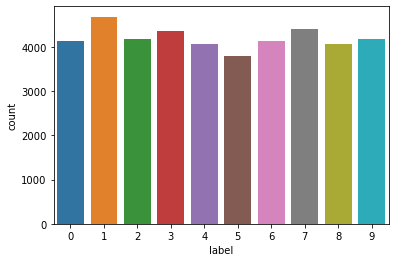

In [17]:
sns.countplot(Y_train)

In [26]:
X_train.isnull().any().sum() # Check for null values

0

In [27]:
test.isnull().any().sum()

0

In [ ]:
X_train = X_train / 255.0 # We want to normalize data to be in [0..1]
test = test / 255.0

In [35]:
# Convert train dataset to (num_images, img_rows, img_cols, channel) format. channel = 1 for grayscale image
X_train = X_train.values.reshape(42000,28,28,1) 
test = test.values.reshape(28000,28,28,1)

In [36]:
Y_train = to_categorical(Y_train) # one-hot encoding

In [43]:
Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

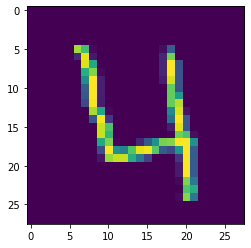

In [46]:
plt.imshow(X_train[3]) # example of a hand-written number image

In [91]:
# Building a CNN model (based on LeNet architecture)

model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', activation = 'sigmoid', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'valid', activation = 'sigmoid'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation = 'sigmoid'))
model.add(Dense(84, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

In [92]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_8 (Dense)              (None, 84)              

In [93]:
# Split into train and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=101) 

In [94]:
# loss function used for categorical classifications above binary is: 'categorical_crossentropy'
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [95]:
history = model.fit(X_train, Y_train, batch_size=128, epochs = 20, validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/20
240/240 - 4s - loss: 1.6247 - accuracy: 0.4873 - val_loss: 0.7016 - val_accuracy: 0.8089
Epoch 2/20
240/240 - 4s - loss: 0.4957 - accuracy: 0.8584 - val_loss: 0.3803 - val_accuracy: 0.8892
Epoch 3/20
240/240 - 4s - loss: 0.3119 - accuracy: 0.9071 - val_loss: 0.2517 - val_accuracy: 0.9286
Epoch 4/20
240/240 - 4s - loss: 0.2216 - accuracy: 0.9353 - val_loss: 0.1816 - val_accuracy: 0.9515
Epoch 5/20
240/240 - 4s - loss: 0.1694 - accuracy: 0.9503 - val_loss: 0.1423 - val_accuracy: 0.9583
Epoch 6/20
240/240 - 4s - loss: 0.1392 - accuracy: 0.9583 - val_loss: 0.1145 - val_accuracy: 0.9659
Epoch 7/20
240/240 - 4s - loss: 0.1174 - accuracy: 0.9643 - val_loss: 0.1031 - val_accuracy: 0.9703
Epoch 8/20
240/240 - 4s - loss: 0.1026 - accuracy: 0.9691 - val_loss: 0.0974 - val_accuracy: 0.9697
Epoch 9/20
240/240 - 4s - loss: 0.0926 - accuracy: 0.9723 - val_loss: 0.0835 - val_accuracy: 0.9724
Epoch 10/20
240/240 - 4s - loss: 0.0845 - accuracy: 0.9744 - val_loss: 0.0750 - val_accuracy: 0.9762

In [125]:
print('Training accuracy is {}'.format(history.history['accuracy'][-1]))
print('Validation accuracy is {}'.format(history.history['val_accuracy'][-1]))

Training accuracy is 0.9855967164039612
Validation accuracy is 0.982657253742218


In [123]:
history.history['accuracy'][-1]

0.9855967164039612

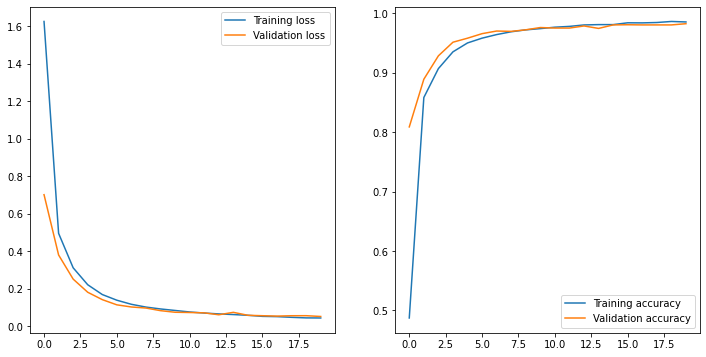

In [98]:
fig, ax = plt.subplots(1,2, figsize= (12,6))

ax[0].plot(history.history['loss'], label = 'Training loss')
ax[0].plot(history.history['val_loss'], label = 'Validation loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label = 'Training accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'Validation accuracy')
ax[1].legend()
#Our model is good, with validation accuracy of 98.27% and have no signs of overfitting

In [99]:
Y_pred = model.predict(X_val)

In [102]:
Y_pred = np.argmax(Y_pred, axis = 1) # We must convert predictions to one-hot vectors

In [103]:
Y_true = np.argmax(Y_val, axis = 1)

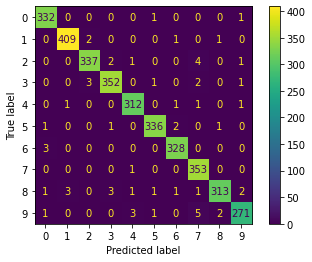

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(Y_true,Y_pred)).plot()
#Seems like a pretty good model with most mistakes on predicting a 8 and 9 digit

In [126]:
results = model.predict(test)

In [128]:
results = np.argmax(results, axis=1)

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [152]:
# Let's try something slightly different from  LeNet architecture and compare results
# We will change Average Pooling for a Max Pooling as a more modern solution
# We will turn on padding in second convolutional layer
# We will change activation function to 'rectified linear units' - ReLU
# We will change validation data perc. to 0.2


model_new = Sequential()

model_new.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model_new.add(MaxPool2D(pool_size=(2,2)))
model_new.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'same', activation = 'relu'))
model_new.add(MaxPool2D(pool_size=(2,2)))
model_new.add(Flatten())
model_new.add(Dense(120, activation = 'relu'))
model_new.add(Dense(84, activation = 'relu'))
model_new.add(Dense(10, activation = 'softmax'))

In [153]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=101) 

In [154]:
model_new.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [155]:
history = model_new.fit(X_train, Y_train, batch_size=128, epochs = 200, validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/200
124/124 - 3s - loss: 0.9007 - accuracy: 0.8012 - val_loss: 0.2682 - val_accuracy: 0.9216
Epoch 2/200
124/124 - 3s - loss: 0.1809 - accuracy: 0.9463 - val_loss: 0.1708 - val_accuracy: 0.9473
Epoch 3/200
124/124 - 3s - loss: 0.1146 - accuracy: 0.9655 - val_loss: 0.1302 - val_accuracy: 0.9612
Epoch 4/200
124/124 - 3s - loss: 0.0720 - accuracy: 0.9779 - val_loss: 0.1157 - val_accuracy: 0.9645
Epoch 5/200
124/124 - 3s - loss: 0.0495 - accuracy: 0.9845 - val_loss: 0.1175 - val_accuracy: 0.9642
Epoch 6/200
124/124 - 3s - loss: 0.0306 - accuracy: 0.9911 - val_loss: 0.1066 - val_accuracy: 0.9685
Epoch 7/200
124/124 - 2s - loss: 0.0166 - accuracy: 0.9957 - val_loss: 0.1046 - val_accuracy: 0.9725
Epoch 8/200
124/124 - 3s - loss: 0.0137 - accuracy: 0.9962 - val_loss: 0.1144 - val_accuracy: 0.9745
Epoch 9/200
124/124 - 2s - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.1103 - val_accuracy: 0.9725
Epoch 10/200
124/124 - 3s - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.1481 - val_accura

In [145]:
print('Old model performance: \nTraining accuracy is 0.9855967164039612\nValidation accuracy is 0.982657253742218\n\n')
print('New model performance:')
print('Training accuracy is {}'.format(history.history['accuracy'][-1]))
print('Validation accuracy is {}'.format(history.history['val_accuracy'][-1]))

Old model performance: 
Training accuracy is 0.9855967164039612
Validation accuracy is 0.982657253742218


New model performance:
Training accuracy is 0.9986391067504883
Validation accuracy is 0.9814516305923462


In [ ]:
# # Changed back padding to 'same' in second layer

# print('Old model performance: \nTraining accuracy is 0.9855967164039612\nValidation accuracy is 0.982657253742218\n\n')
# print('New model performance:')
# print('Training accuracy is {}'.format(history.history['accuracy'][-1]))
# print('Validation accuracy is {}'.format(history.history['val_accuracy'][-1]))

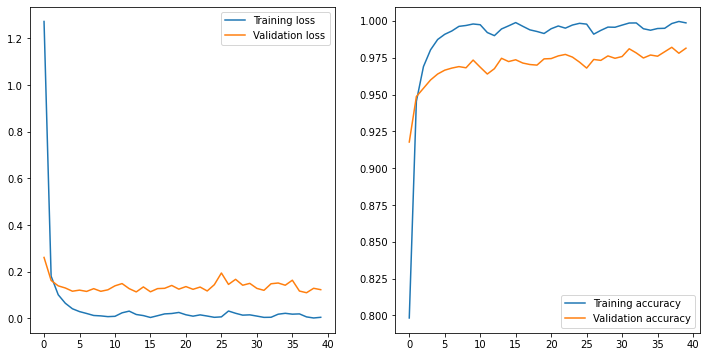

In [146]:
fig, ax = plt.subplots(1,2, figsize= (12,6))

ax[0].plot(history.history['loss'], label = 'Training loss')
ax[0].plot(history.history['val_loss'], label = 'Validation loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label = 'Training accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'Validation accuracy')
ax[1].legend()

In [147]:
Y_pred = model.predict(X_val)
Y_pred = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)

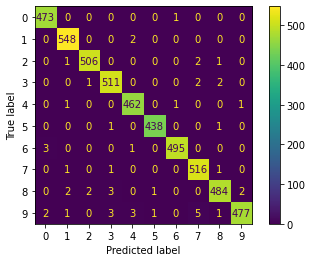

In [148]:
ConfusionMatrixDisplay(confusion_matrix(Y_true,Y_pred)).plot()

In [151]:
print(classification_report(Y_true,Y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9895    0.9979    0.9937       474
           1     0.9892    0.9964    0.9928       550
           2     0.9941    0.9922    0.9931       510
           3     0.9846    0.9903    0.9874       516
           4     0.9872    0.9935    0.9904       465
           5     0.9955    0.9955    0.9955       440
           6     0.9960    0.9920    0.9940       499
           7     0.9829    0.9942    0.9885       519
           8     0.9878    0.9798    0.9837       494
           9     0.9938    0.9675    0.9805       493

    accuracy                         0.9899      4960
   macro avg     0.9900    0.9899    0.9900      4960
weighted avg     0.9899    0.9899    0.9899      4960

